### 1. Посмотреть документацию к API GitHub, разобраться как вывести список репозиториев для конкретного пользователя, сохранить JSON-вывод в файле *.json. ###

In [1]:
from pprint import pprint
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
          AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36',
          'Accept':'*/*'}


user="RostislavIllyk"
#user="IvanMaksimov"
#user="geangohn"

def get_repo_dic(user):
    print('User name is: ', user)
    print()
    main_link = 'https://api.github.com/users/'+str(user)+'/repos'
    response = requests.get(main_link,headers=header)
    
    if response.ok:
        data = json.loads(response.text)
    else:
        print('Check the user name!!!')
        return
    
    repo_dic={}
    for i in range(len(data)):
        repo_dic[str(i)]=data[i]['html_url']
        print(data[i]['html_url'])
    print()
    pprint(repo_dic)
    
    with open('repo_dic.json', 'w') as f:
        f.write(json.dumps(repo_dic))
    
    return

get_repo_dic(user)



User name is:  RostislavIllyk

https://github.com/RostislavIllyk/CV
https://github.com/RostislavIllyk/mysql_home_works
https://github.com/RostislavIllyk/Python-for-Data-Science-Home-Works
https://github.com/RostislavIllyk/RB

{'0': 'https://github.com/RostislavIllyk/CV',
 '1': 'https://github.com/RostislavIllyk/mysql_home_works',
 '2': 'https://github.com/RostislavIllyk/Python-for-Data-Science-Home-Works',
 '3': 'https://github.com/RostislavIllyk/RB'}


---

### 2. Изучить список открытых API. Найти среди них любое, требующее авторизацию (любого типа). Выполнить запросы к нему, пройдя авторизацию. Ответ сервера записать в файл. ###

date          : 2020-05-13
time          : 2100
swellHeight_m : 1.6
swellDirection: E
waterTemp_C   : 31
windDirection : WSW
windspeedMiles: 17


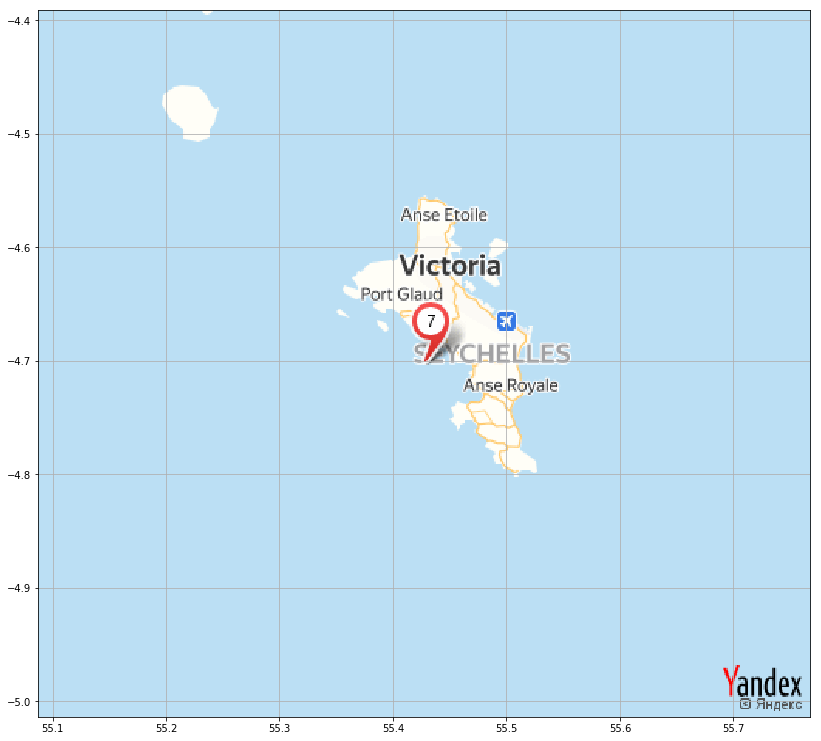

In [2]:
url="https://static-maps.yandex.ru/1.x"
params = {
          'lang':'en_US',
          'll':'55.4395552,-4.7085',
          'size':'500,450',
          'z':'10',
          'l':'map',
          'pt':'55.4395552,-4.7085,pm2rdl7' #mark
          }

response = requests.get(url,headers=header,
                        params=params)
with open('map.png','wb') as f:
     f.write(response.content)

plt.figure(figsize=(20,13))
plt.imshow(mpimg.imread('map.png'), extent=[55.0876, 55.7679, -5.0138, -4.3911])
plt.grid()            
        
    
url="http://api.worldweatheronline.com/premium/v1/marine.ashx"
params = {
          'key':'5f16566562314dd99d5120007201305',
          'format':'json',
          'q':'-4.7085, 55.4395552'    
          }

response = requests.get(url,headers=header
                        ,params=params
                        )

if response.ok:
    data = json.loads(response.text)
        
    print('date          :',data['data']['weather'][0]['date'])
    print('time          :', data['data']['weather'][0]['hourly'][7]['time'])
    print('swellHeight_m :',data['data']['weather'][0]['hourly'][7]['swellHeight_m'])
    print('swellDirection:',data['data']['weather'][0]['hourly'][7]['swellDir16Point'])
    print('waterTemp_C   :',data['data']['weather'][0]['hourly'][7]['waterTemp_C'])
    print('windDirection :',data['data']['weather'][0]['hourly'][7]['winddir16Point'])
    print('windspeedMiles:',data['data']['weather'][0]['hourly'][7]['windspeedMiles'])

    with open('data.json', 'w') as f:
        f.write(json.dumps(data))
else:
    print('Error...')
